<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-05 12:45:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.1MB/s    in 2.7s    

2025-03-05 12:45:42 (57.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib
!!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df_count = pd.read_sql_query(QUERY, conn)
df_count.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""

pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df_columns=pd.read_sql_query(QUERY, conn)
print(df_columns.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


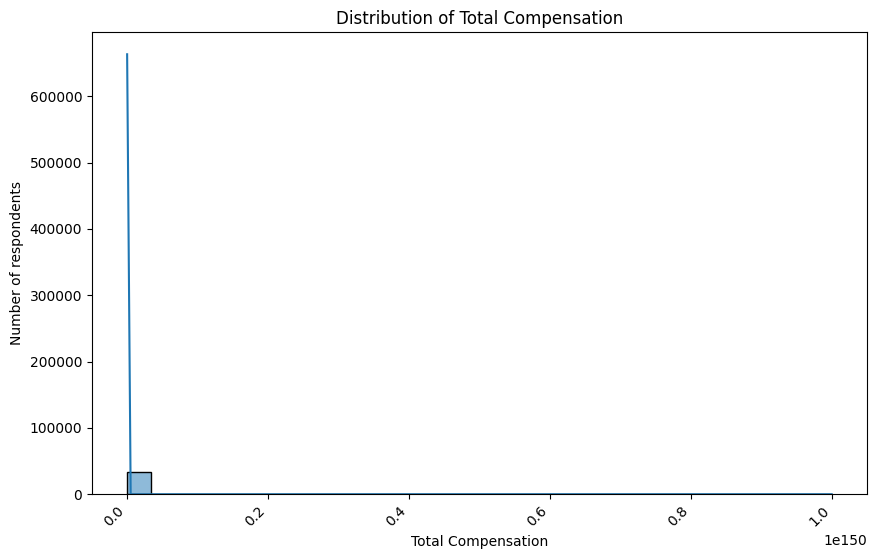

In [11]:

#Create Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['CompTotal'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Compensation')
plt.xlabel ('Total Compensation')
plt.ylabel('Number of respondents')
plt.xticks(rotation=45, ha='right')

plt.show()

**Box Plots**

Plot a box plot of Age.


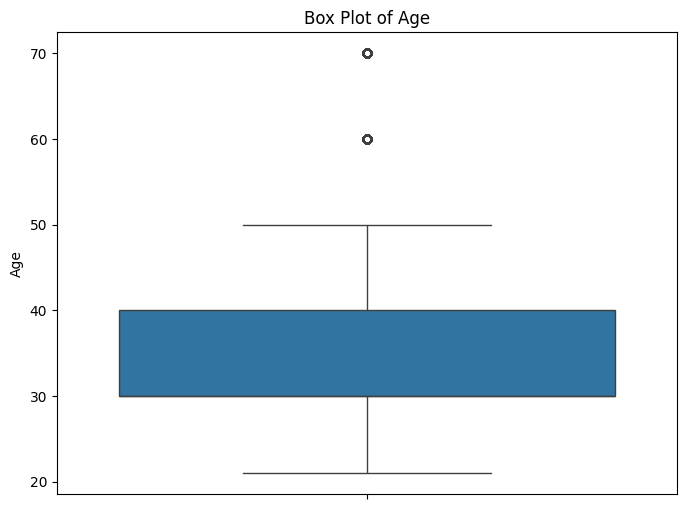

In [12]:
QUERY = """
SELECT *,
    CASE Age
        WHEN 'Under 18' THEN 17
        WHEN '18-24 years old' THEN 21
        WHEN '25-34 years old' THEN 30
        WHEN '35-44 years old' THEN 40
        WHEN '45-54 years old' THEN 50
        WHEN '55-64 years old' THEN 60
        WHEN '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric
FROM main;
"""

df_numeric= pd.read_sql_query(QUERY, conn)

# box plot with the new column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_numeric['Age_numeric'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


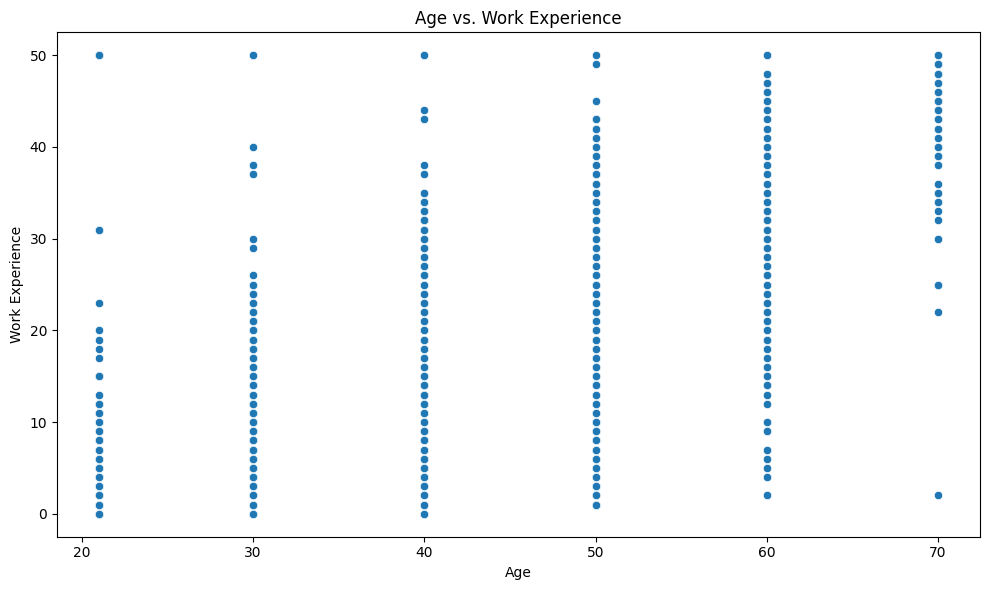

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_numeric, x='Age_numeric', y='WorkExp')
plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')

plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [14]:
#check the values from the columns
print(df['TimeSearching'].unique())
print(df['Frustration'].value_counts())

[nan '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']
Frustration
None of these                                                                                                                                                                                                                                              2364
Amount of technical debt                                                                                                                                                                                                                                   2067
Amount of technical debt;Reliability of tools/systems used in work                                                                                                                                                                                          831
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack fo

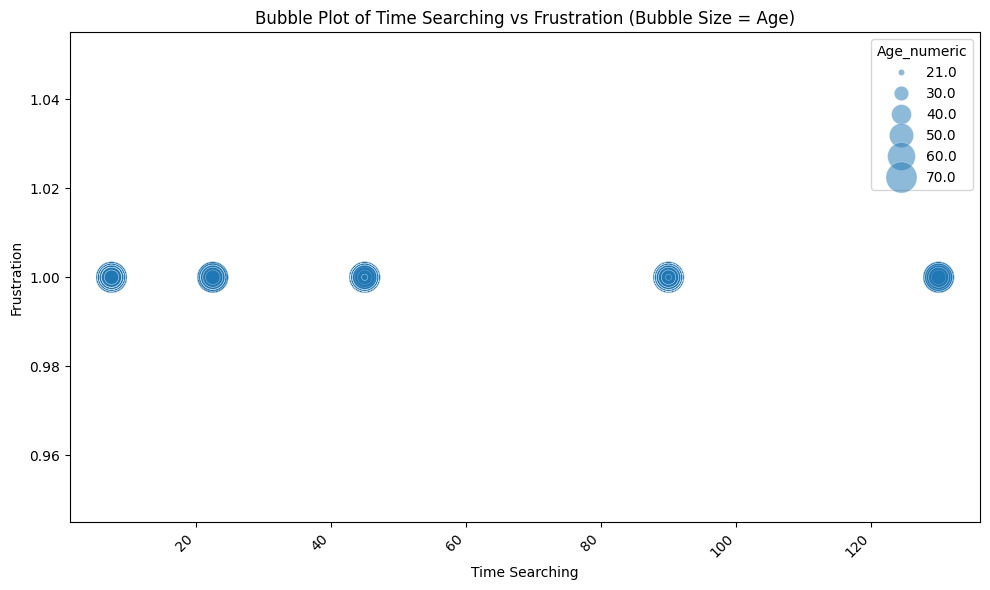

In [15]:
#Transform the selected data in a numeric value
QUERY = """
SELECT *,
CASE Age
        WHEN 'Under 18' THEN 17
        WHEN '18-24 years old' THEN 21
        WHEN '25-34 years old' THEN 30
        WHEN '35-44 years old' THEN 40
        WHEN '45-54 years old' THEN 50
        WHEN '55-64 years old' THEN 60
        WHEN '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric,
CASE TimeSearching
        WHEN 'Less than 15 minutes a day' THEN 7.5
        WHEN '15-30 minutes a day' THEN 22.5
        WHEN '30-60 minutes a day' THEN 45
        WHEN '60-120 minutes a day' THEN 90
        WHEN 'Over 120 minutes a day' THEN 130
        ELSE NULL
    END AS TimeSearching_numeric,
CASE Frustration
         WHEN Frustration IN ('None', 'None of these') THEN 0
         ELSE 1
    END AS Frustration_numeric
FROM main;
"""

df_numeric = pd.read_sql_query(QUERY, conn)

#create bubleplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x="TimeSearching_numeric", y="Frustration_numeric", size="Age_numeric", sizes=(20, 500), alpha=0.5)

plt.xlabel("Time Searching")
plt.ylabel("Frustration")
plt.title("Bubble Plot of Time Searching vs Frustration (Bubble Size = Age)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [16]:
missing_values = df['DatabaseWantToWorkWith'].isnull().sum()
print(f"Missing values in 'DatabaseWantToWorkWith': {missing_values}")

Missing values in 'DatabaseWantToWorkWith': 22879


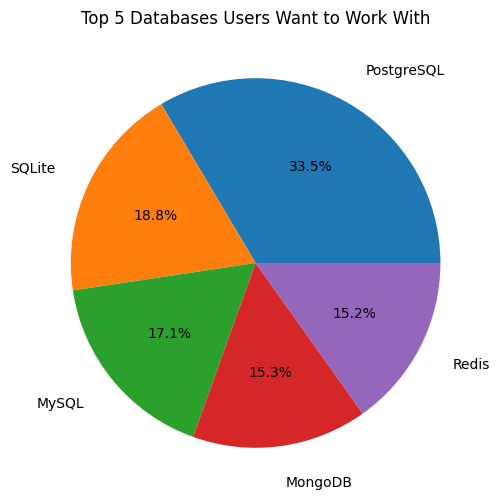

In [17]:
#Replace missing values
databases_separated = df['DatabaseWantToWorkWith'].fillna('Unknown')

#separate the answers that contains multiple values
databases_separated = df['DatabaseWantToWorkWith'].str.split(';', expand=True)
databases_list = databases_separated.stack().reset_index(drop=True)

#Top 5 databases wo Unknown
top_5_databases = databases_list[databases_list != 'Unknown'].value_counts().head(5)

#create Pie Chart
plt.figure(figsize=(12,6))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', labeldistance=1.2)

plt.title('Top 5 Databases Users Want to Work With')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [18]:
print(df['TimeAnswering'].value_counts())
print(df['TimeSearching'].value_counts())

TimeAnswering
15-30 minutes a day           9341
30-60 minutes a day           8642
Less than 15 minutes a day    5918
60-120 minutes a day          3704
Over 120 minutes a day        1239
Name: count, dtype: int64
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


TimeSearching_numeric    45.0
TimeAnswering_numeric    22.5
dtype: float64


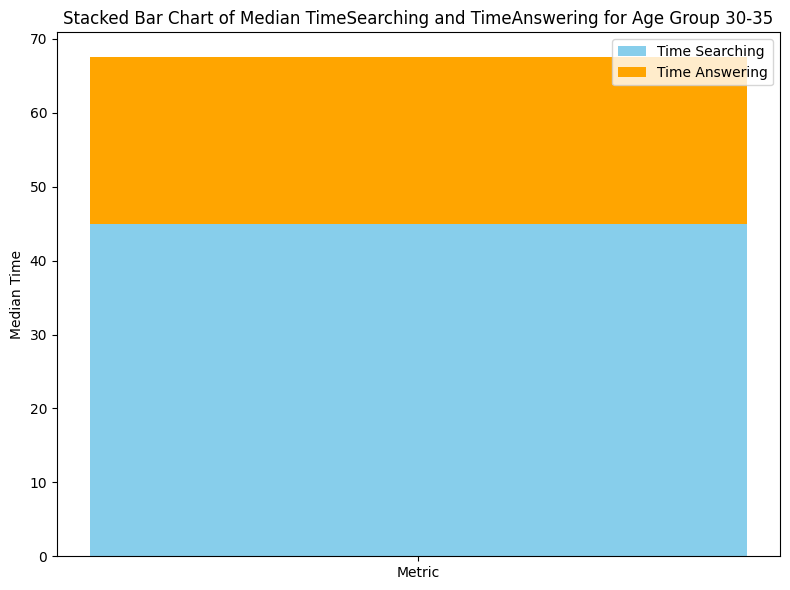

In [19]:
QUERY = """
SELECT *,
CASE Age
        WHEN 'Under 18' THEN 17
        WHEN '18-24 years old' THEN 21
        WHEN '25-34 years old' THEN 30
        WHEN '35-44 years old' THEN 40
        WHEN '45-54 years old' THEN 50
        WHEN '55-64 years old' THEN 60
        WHEN '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric,
CASE TimeSearching
        WHEN 'Less than 15 minutes a day' THEN 7.5
        WHEN '15-30 minutes a day' THEN 22.5
        WHEN '30-60 minutes a day' THEN 45
        WHEN '60-120 minutes a day' THEN 90
        WHEN 'Over 120 minutes a day' THEN 130
        ELSE NULL
    END AS TimeSearching_numeric,
CASE TimeAnswering
        WHEN 'Less than 15 minutes a day' THEN 7.5
        WHEN '15-30 minutes a day' THEN 22.5
        WHEN '30-60 minutes a day' THEN 45
        WHEN '60-120 minutes a day' THEN 90
        WHEN 'Over 120 minutes a day' THEN 130
        ELSE NULL
    END AS TimeAnswering_numeric
FROM main
WHERE Age_numeric BETWEEN 30 AND 35;
"""
df_numeric_30_35= pd.read_sql_query(QUERY, conn)

#calculate the median
median_values = df_numeric_30_35[['TimeSearching_numeric', 'TimeAnswering_numeric']].median()
print(median_values)
#create the plot
plt.figure(figsize=(8, 6))

plt.bar('Metric', median_values['TimeSearching_numeric'], label='Time Searching', color='skyblue')
plt.bar('Metric', median_values['TimeAnswering_numeric'], 
        bottom=median_values['TimeSearching_numeric'], label='Time Answering', color='orange')

plt.ylabel('Median Time')
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering for Age Group 30-35')

plt.legend()

plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [20]:
missing_values_comp= df['CompTotal'].isnull().sum()
print(f"Missing values in 'CompTotal': {missing_values_comp}")
print(df_numeric['Age_numeric'].unique())

Missing values in 'CompTotal': 31697
[nan 40. 50. 21. 30. 60. 70.]


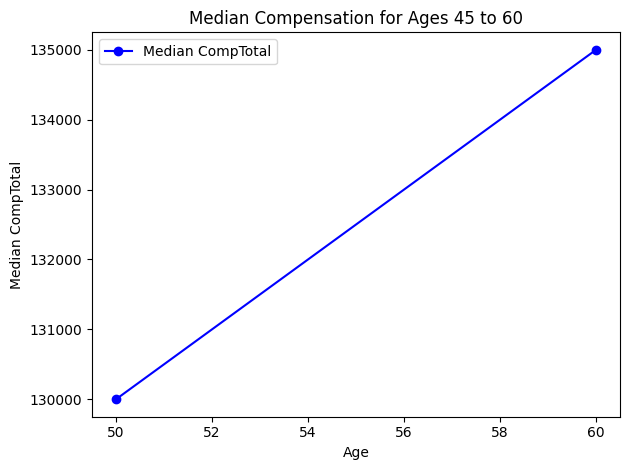

(4795, 117)


In [21]:
#eliminate missing values
df_numeric.dropna(subset=['CompTotal'], inplace=True)

#calculate the median for all ages from 45 to 60
df_filtered = df_numeric[(df_numeric['Age_numeric'] == 50) | (df_numeric['Age_numeric'] == 60)]
median_values_comp_by_age = df_filtered.groupby('Age_numeric')['CompTotal'].median()

#create the plot
plt.plot(median_values_comp_by_age.index, median_values_comp_by_age.values, marker='o', color='b', label='Median CompTotal')

plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.title('Median Compensation for Ages 45 to 60')
plt.legend()

plt.tight_layout()
plt.show()
print(df_filtered.shape)


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [22]:
#search missing values
df['MainBranch'].isnull().sum()
print(df['MainBranch'].unique())
print(df['MainBranch'].value_counts())

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


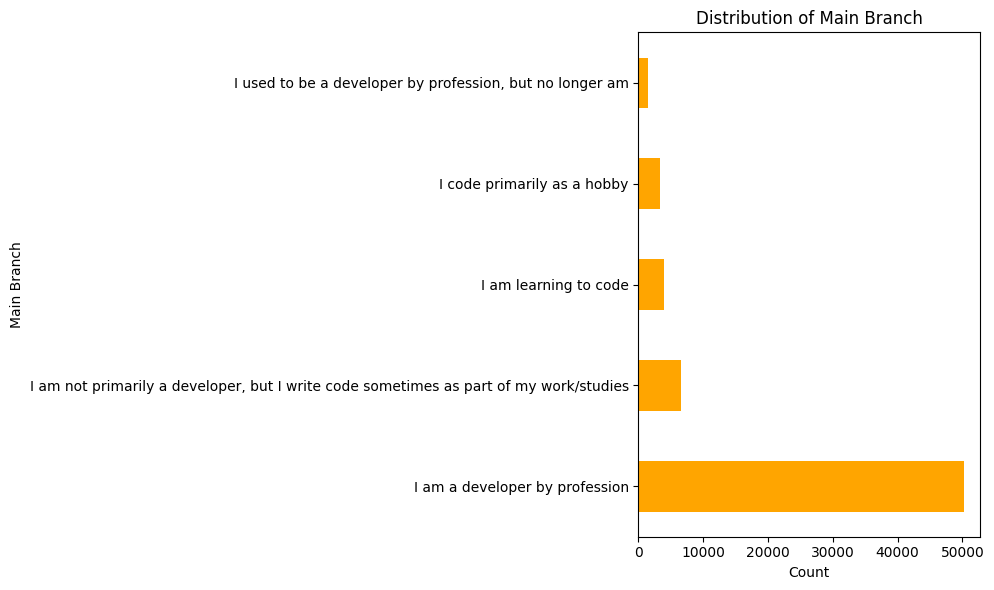

In [23]:
mainbranch_counts = df['MainBranch'].value_counts()

#create bar chart
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind='barh', color='orange')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')

plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [24]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
